# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.69dev'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, filetype, prefix, prefix_str, file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
# This loads in the spectra you saved as weak, medium and strong etc
import os
df2=pf.merge_fit_files(path=os.getcwd())

## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'NE22.txt'

## Now get all the important information out of the metadata files

In [5]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=prefix_str,
trupower=TruPower)
meta.head()

100%|██████████| 114/114 [00:04<00:00, 27.69it/s]

Done
Oof, try not to work after midnight!


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
99,POC49.txt,"November 29, 2020\n",November,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:02:59 AM\n,86579.0,1341.0
46,NE68.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:07:01 AM\n,86821.0,1341.0
101,POC50.txt,"November 29, 2020\n",November,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:09:42 AM\n,86982.0,1341.0
47,NE69.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:14:20 AM\n,87260.0,1341.0
102,POC51.txt,"November 29, 2020\n",November,29.0,NaN,60.0,3.0,5.0,"['0h', '3m', '2s']",12:17:28 AM\n,87448.0,1341.0


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'POC49'

## Now get filename from spectra into same form as metadata

In [7]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
Cap19-05X2


In [8]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,POC51,102.740399,0.010583,1286.697193,0.009200,180.746528,1286.697193,239.558562,0.614598,2.696706,...,November,29.0,NaN,60.0,3.0,5.0,"['0h', '3m', '2s']",12:17:28 AM\n,87448.0,1341.0
1,POC52,102.734414,0.009433,1286.689692,0.008329,245.538347,1286.689692,313.494012,0.595481,3.724453,...,November,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '31s']",12:31:31 AM\n,88291.0,1341.0
2,POC53,102.760801,0.005166,1286.675346,0.000000,219.839977,1286.675396,284.097302,0.604900,2.925835,...,November,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:39:13 AM\n,88753.0,1341.0
3,POC54,102.759256,0.012187,1286.683864,0.010470,183.869659,1286.683914,241.653282,0.617334,2.796401,...,November,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:46:57 AM\n,89217.0,1341.0
4,POC55,102.727685,0.014226,1286.707696,0.012578,156.794385,1286.707696,208.195957,0.623706,2.929959,...,November,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:54:26 AM\n,89666.0,1341.0


## If you have secondary phases, now is the time to merge those in

In [9]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=prefix_str, file_ext=file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [10]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,POC51,0.020974,0.005805,0.004287,0.003914,102.803187,0.010820,0.002219,0.010583,NaN,...,60.0,3.0,5.0,"['0h', '3m', '2s']",12:17:28 AM\n,87448.0,87448.0,1.000611,1.00059,1.000633
1,POC52,0.018607,0.005490,0.003842,0.003922,102.797215,0.009697,0.002222,0.009433,NaN,...,90.0,3.0,5.0,"['0h', '4m', '31s']",12:31:31 AM\n,88291.0,88291.0,1.000611,1.00059,1.000633
2,POC53,0.029072,0.004482,0.002230,0.003888,102.823626,0.005627,0.002223,0.005166,NaN,...,90.0,3.0,5.0,"['0h', '4m', '32s']",12:39:13 AM\n,88753.0,88753.0,1.000611,1.00059,1.000633
3,POC54,0.028463,0.006266,0.004912,0.003890,102.822089,0.012396,0.002225,0.012187,NaN,...,90.0,3.0,5.0,"['0h', '4m', '32s']",12:46:57 AM\n,89217.0,89217.0,1.000611,1.00059,1.000633
4,POC55,0.015950,0.006931,0.005709,0.003931,102.790508,0.014408,0.002225,0.014226,NaN,...,90.0,3.0,5.0,"['0h', '4m', '32s']",12:54:26 AM\n,89666.0,89666.0,1.000612,1.00059,1.000633


In [11]:
# This cell saves the merged together dataframe with the folder name and the date you fitted it
from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_November 29, 2020_fitted_2023-07-17.xlsx


## This helps visualize the errors on each spectra 

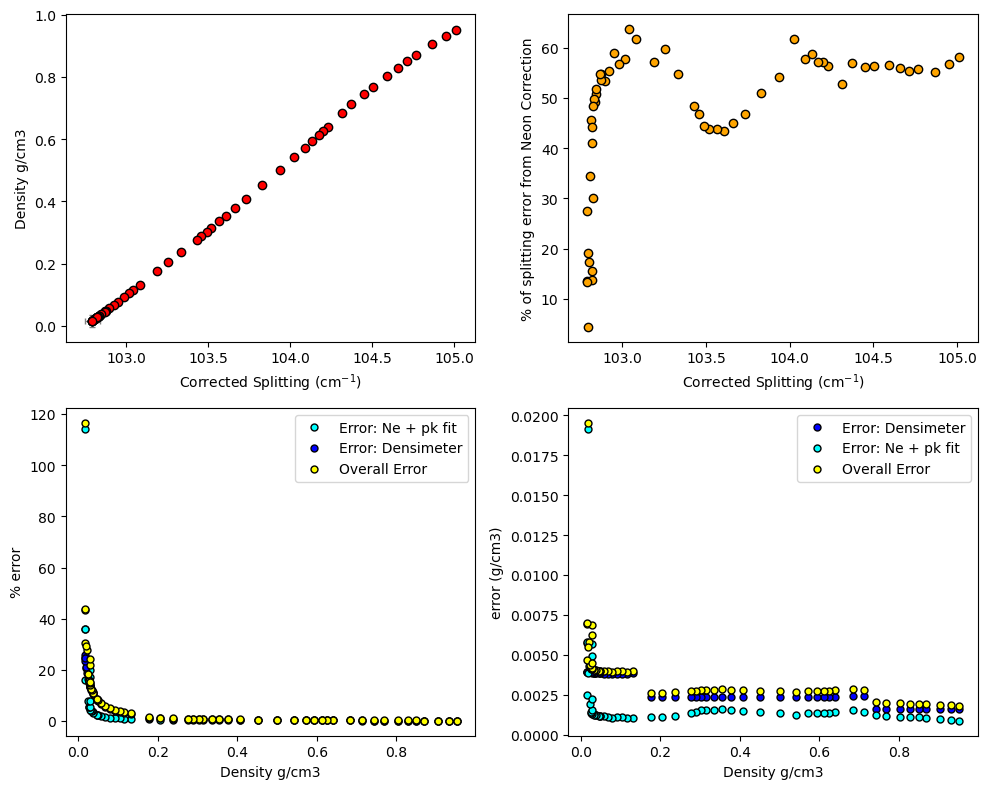

In [12]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## IF FIs
- This calculates an estimated pressure of entrapment based on a temperature you have estimated

Text(0.5, 0, 'Depth (km)')

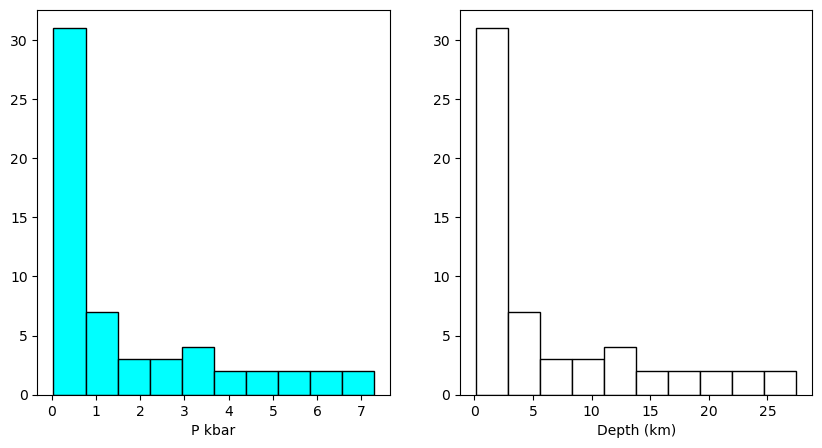

In [13]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2700)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan')
ax2.hist(Depth, ec='k', fc='white')
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')